In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def binary(txt):
  if type(txt) == str:
    return ''.join([ format(ord(i), "08b") for i in txt ])
  elif type(txt) == int or type(txt) == np.uint8:
    return format(txt, "08b")
  elif type(txt) == bytes or type(txt) == np.ndarray:
    return [ format(i, "08b") for i in txt ]
  else:
    raise TypeError("INVALID INPUT")

In [6]:
def encode(msg, img):
  no = img.shape[0] * img.shape[1] * 3 // 8
  if len(msg) > no:
      raise ValueError("IMAGE TOO SMALL")
  msg += "$" 
  index = 0
  bmsg = binary(msg)
  bmsg_len = len(bmsg) 
  for i in img:
    for pixel in i:
          r, g, b = binary(pixel)
          if index < bmsg_len:
              pixel[0] = int(r[:-1] + bmsg[index], 2)
              index += 1
          if index < bmsg_len:
              pixel[1] = int(g[:-1] + bmsg[index], 2)
              index += 1
          if index < bmsg_len:
              pixel[2] = int(b[:-1] + bmsg[index], 2)
              index += 1
          if index >= bmsg_len:
              break
  return img

In [7]:
def decode(img):
  binary_data = ""
  for i in img:
      for pixel in i:
          r, g, b = binary(pixel)
          binary_data += r[-1]
          binary_data += g[-1]
          binary_data += b[-1] 
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-1] == "$":
          break
  return decoded_data[:-1]

In [8]:
def input_img(): 
  img_name = input("ENTER THE IMAGE NAME - ") 
  img = cv2.imread(img_name)
  print("ORIGINAL IMAGE - ")
  image = cv2.resize(img, (400, 400))
  imgplot = plt.imshow(image)
  plt.show()
  d = input("ENTER THE MESSAGE - ") 
  if (len(d) == 0): 
    raise ValueError('INVALID MESSAGE')
  fname = input("ENTER THE NAME OF ENCODED IMAGE - ")
  encoded_image = encode(d, img) 
  cv2.imwrite(fname, encoded_image)

In [9]:
def output():
  image_name = input("ENTER THE NAME OF THE IMAGE TO BE DECODED - ") 
  image = cv2.imread(image_name)
  print("The ENCODED IMAGE  - ")
  rimage = cv2.resize(image, (400, 400))
  imgplot = plt.imshow(rimage)
  plt.show()
  text = decode(image)
  return text


 1. ENCODE 
 2. DECODE 
 ENTER THE CHOICE - 1
ENTER THE IMAGE NAME - corona.jfif
ORIGINAL IMAGE - 


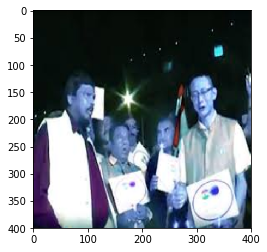

ENTER THE MESSAGE - go corona corona go
ENTER THE NAME OF ENCODED IMAGE - cor.png


In [10]:
def main(): 
    inp = int(input("\n 1. ENCODE \n 2. DECODE \n ENTER THE CHOICE - "))
    if (inp == 1):
      input_img() 
          
    elif (inp == 2):
      print("DECODED MESSAGE - " + output()) 
    else: 
        raise Exception("INVALID INPUT") 
          
main()


 1. ENCODE 
 2. DECODE 
 ENTER THE CHOICE - 2
ENTER THE NAME OF THE IMAGE TO BE DECODED - cor.png
The ENCODED IMAGE  - 


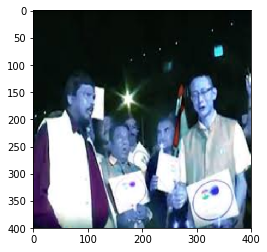

DECODED MESSAGE - go corona corona go


In [11]:
main()